<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU04_Optimización de vacunas</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > III - Feature Engineering Domain </font>
***
> # <font color='steelblue'> <b>14.- Feature Data Transform</font>

<font color='steelblue'>Feature Data Transform is the process that allows change (if is required) the type and/or distribution of data features (e.g. scaling, normalizing o standardizing data features).</font>


## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Perform Basic Data Transforms						
    
<font color='steelblue'><b>Perform Categorical Variable Transformation						
- Encode Transformation					
    - One-hot encoding				
    - Ordinal encoding				
    - Dummy encoding				
- Evaluate a Logistic Regression model					
- Consider Embedding if text mining context					
    
<font color='steelblue'><b>Perform Numeric Variable Transformation						
- Scale Transformation					
    - Normalization				
    - Standardization				
    - IQR Robust Scaler Transform				
    - Evaluate a KNN model				
- Distribution Transformation					
    - Discretization				
        - Uniform			
        - Clustered(k-Means)			
        - Quantile			
            - Normal Quantile		
            - Uniform Quantile		
            - Evaluate a KNN model		
        - Evaluate a KNN model			
    - Power transforms (Make Distributions More Gaussian)				
        - Box-Cox Transform			
        - Yeo-Johnson Transform			
        - Evaluate a KNN model			


## Consideraciones casos CitizenLab programados en R

* Algunas de las tareas de este proceso se han realizado en los notebooks del proceso 05 Data Collection porque eran necesarias para las tareas ETL. En esos casos, en este notebook se referencia al notebook del proceso 05 correspondiente
* Otras tareas típicas de este proceso se realizan en los notebooks del dominio IV al ser más eficiente realizarlas en el propio pipeline de modelización.
* Por tanto en los notebooks de este proceso de manera general se incluyen las comprobaciones necesarias, y comentarios si procede
* Las tareas del proceso se van a aplicar solo a los archivos que forman parte del despliegue, ya que hay muchos archivos intermedios que no procede pasar por este proceso
* El nombre de archivo del notebook hace referencia al nombre de archivo del proceso 05 al que se aplica este proceso, por eso pueden no ser correlativa la numeración
* Las comprobaciones se van a realizar teniendo en cuenta que el lenguaje utilizado en el despliegue de este caso es R

## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_04_08_20_vacunacion_gripe_train_and_test.csv</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

Warning message in Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8"):
“OS reports request to set locale to "es_ES.UTF-8" cannot be honored”


[1] ""

## <font color='green'>Settings</font>

### Libraries to use

In [2]:
library(readr)
library(dplyr)
library(tidyr)
library(forcats)
library(lubridate)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Paths

In [3]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [4]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [5]:
iFile <- "CU_04_08_20_vacunacion_gripe_train_and_test.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_04_08_20_vacunacion_gripe_train_and_test.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [6]:
data <- read_csv(file_data)


Rows: 21736 Columns: 49
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): GEOCODIGO, DESBDT, nombre_zona
dbl (45): ano, semana, n_vacunas, n_citas, tmed, prec, velmedia, presMax, be...
lgl  (1): is_train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Estructura de  los datos:

In [7]:
data |> glimpse()

Rows: 21,736
Columns: 49
$ GEOCODIGO         <chr> "259", "260", "041", "025", "046", "159", "065", "09…
$ DESBDT            <chr> "V Centenario", "Valdeacederas", "Canillejas", "Bara…
$ ano               <dbl> 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2021, 2023…
$ semana            <dbl> 34, 8, 9, 49, 24, 3, 8, 47, 1, 2, 52, 39, 16, 50, 34…
$ n_vacunas         <dbl> 0, 0, 0, 292, 0, 524, 0, 248, 204, 205, NA, 0, 0, 51…
$ n_citas           <dbl> 0, 0, 0, 280, 0, 498, 0, 228, 198, 187, NA, 0, 0, 51…
$ tmed              <dbl> 27.278748, 9.577289, 8.536554, 9.065363, 29.905728, …
$ prec              <dbl> 0.169955881, 1.264910043, 3.122881160, 7.313886680, …
$ velmedia          <dbl> 2.297067, 1.890425, 2.418071, 1.562328, 2.564749, 1.…
$ presMax           <dbl> 940.0420, 944.1770, 949.7179, 941.8342, 940.5669, 95…
$ benzene           <dbl> 0.1764413, 0.4591543, 0.4099159, 0.4224172, 0.195865…
$ co                <dbl> 0.4987735, 0.3960647, 0.3951587, NA, 0.2891224, 0.50…
$ no           

Muestra de los primeros datos:

In [8]:
data |> slice_head(n = 5)

GEOCODIGO,DESBDT,ano,semana,n_vacunas,n_citas,tmed,prec,velmedia,presMax,⋯,t9_1,t10_1,t11_1,t12_1,area,densidad_hab_km,tuits_gripe,interes_gripe,Target,is_train
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
259,V Centenario,2022,34,0,0,27.278748,0.16995588,2.297067,940.0420,⋯,0.5151383,0.09258503,0.6406787,0.7028586,2100118.9,15131.524,60,24,0,TRUE
260,Valdeacederas,2022,8,0,0,9.577289,1.26491004,1.890425,944.1770,⋯,0.3863876,0.13151901,0.5451465,0.6277335,1164622.0,22498.286,56,15,0,TRUE
041,Canillejas,2022,9,0,0,8.536554,3.12288116,2.418071,949.7179,⋯,0.3129631,0.13926119,0.4600730,0.5346482,1597474.5,17939.566,72,24,0,TRUE
025,Barajas,2022,49,292,280,9.065363,7.31388668,1.562328,941.8342,⋯,0.4611972,0.10460043,0.5920292,0.6590530,3816572.0,5893.247,196,77,292,TRUE
046,Castelló,2022,24,0,0,29.905728,0.01366852,2.564749,940.5669,⋯,0.7018126,0.06114283,0.4717699,0.5025317,870986.8,17738.501,46,21,0,TRUE


## Basic Data Transforms

### Data Selecting

In [9]:
data |> select(1)

GEOCODIGO
<chr>
259
260
041
025
046
159
065
092
221


### Data Filtering

In [10]:
data |> filter(ano == 2021)

GEOCODIGO,DESBDT,ano,semana,n_vacunas,n_citas,tmed,prec,velmedia,presMax,⋯,t9_1,t10_1,t11_1,t12_1,area,densidad_hab_km,tuits_gripe,interes_gripe,Target,is_train
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
092,Felipe II,2021,47,248,228,6.078661,1.0719805983,2.700305,938.7558,⋯,0.2594908,0.14516249,0.4759882,0.5564819,916183.4,22138.5806,280,64,248,TRUE
040,Canal de Panamá,2021,37,0,0,19.878869,4.1447802375,2.575349,943.0739,⋯,0.4866866,0.12070471,0.4696157,0.5343907,1394676.1,22029.4879,79,15,0,TRUE
261,Valdebernardo,2021,42,185,183,15.813806,0.0000000000,2.116845,951.1437,⋯,0.4213997,0.15339911,0.5117686,0.6048410,1452762.2,11210.3689,254,100,185,TRUE
209,Portazgo,2021,45,215,213,10.457078,-0.0014319311,1.568141,944.8039,⋯,0.2192226,0.17912995,0.4312525,0.5261093,1165705.1,15269.7276,160,70,215,TRUE
137,Las Matas,2021,36,0,0,21.968429,0.0611860341,3.079440,913.7501,⋯,0.5515307,0.08716812,0.4943178,0.5414490,7951396.5,837.8402,97,13,0,TRUE
148,Los Cármenes,2021,52,314,305,10.799898,-0.0874709189,3.199149,945.0250,⋯,0.2588885,0.19712587,0.4428873,0.5510904,1597376.5,15830.3315,780,88,314,TRUE
248,Segovia,2021,36,0,0,23.617478,0.0039819559,3.473189,939.5955,⋯,0.6033543,0.13499734,0.5297775,0.6125977,802151.4,29061.8456,97,13,0,TRUE
190,Orcasur,2021,46,131,119,10.204537,0.0450972341,2.319521,946.0922,⋯,0.1755605,0.24707340,0.4146549,0.5496564,1423084.5,7693.8507,206,64,131,TRUE
092,Felipe II,2021,43,226,215,14.797959,6.9555518894,2.814061,944.3144,⋯,0.2594908,0.14516249,0.4759882,0.5564819,916183.4,22138.5806,190,94,226,TRUE


### Insert New Column

In [11]:
data |>
    mutate(x = TRUE)

GEOCODIGO,DESBDT,ano,semana,n_vacunas,n_citas,tmed,prec,velmedia,presMax,⋯,t10_1,t11_1,t12_1,area,densidad_hab_km,tuits_gripe,interes_gripe,Target,is_train,x
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
259,V Centenario,2022,34,0,0,27.278748,0.169955881,2.297067,940.0420,⋯,0.09258503,0.6406787,0.7028586,2100118.9,15131.52443,60,24,0,TRUE,TRUE
260,Valdeacederas,2022,8,0,0,9.577289,1.264910043,1.890425,944.1770,⋯,0.13151901,0.5451465,0.6277335,1164622.0,22498.28643,56,15,0,TRUE,TRUE
041,Canillejas,2022,9,0,0,8.536554,3.122881160,2.418071,949.7179,⋯,0.13926119,0.4600730,0.5346482,1597474.5,17939.56640,72,24,0,TRUE,TRUE
025,Barajas,2022,49,292,280,9.065363,7.313886680,1.562328,941.8342,⋯,0.10460043,0.5920292,0.6590530,3816572.0,5893.24662,196,77,292,TRUE,TRUE
046,Castelló,2022,24,0,0,29.905728,0.013668517,2.564749,940.5669,⋯,0.06114283,0.4717699,0.5025317,870986.8,17738.50106,46,21,0,TRUE,TRUE
159,Mar Báltico,2022,3,524,498,4.717205,0.000000000,1.494957,953.5196,⋯,0.13207313,0.4690937,0.5405803,15368327.1,3284.54748,382,42,524,TRUE,TRUE
065,Daroca,2022,8,0,0,10.233853,1.145128991,2.067554,948.1804,⋯,0.13304421,0.4726520,0.5453497,2813686.8,12136.39007,56,15,0,TRUE,TRUE
092,Felipe II,2021,47,248,228,6.078661,1.071980598,2.700305,938.7558,⋯,0.14516249,0.4759882,0.5564819,916183.4,22138.58056,280,64,248,TRUE,TRUE
221,Ramón y Cajal,2023,1,204,198,8.145987,1.089500548,2.556688,950.0602,⋯,0.14429658,0.3978026,0.4660208,459459.2,43017.96960,24,64,204,TRUE,TRUE


### Delete Column

In [14]:
col <- "DESBDT"

In [16]:
data %>% select(all_of(col))

DESBDT
<chr>
V Centenario
Valdeacederas
Canillejas
Barajas
Castelló
Mar Báltico
Daroca
Felipe II
Ramón y Cajal


### Rank Data

<font color='darkgrey'><b>Operation</font>

In [13]:
data |> mutate(rank = order(Target))

GEOCODIGO,DESBDT,ano,semana,n_vacunas,n_citas,tmed,prec,velmedia,presMax,⋯,t10_1,t11_1,t12_1,area,densidad_hab_km,tuits_gripe,interes_gripe,Target,is_train,rank
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>
259,V Centenario,2022,34,0,0,27.278748,0.169955881,2.297067,940.0420,⋯,0.09258503,0.6406787,0.7028586,2100118.9,15131.52443,60,24,0,TRUE,1
260,Valdeacederas,2022,8,0,0,9.577289,1.264910043,1.890425,944.1770,⋯,0.13151901,0.5451465,0.6277335,1164622.0,22498.28643,56,15,0,TRUE,2
041,Canillejas,2022,9,0,0,8.536554,3.122881160,2.418071,949.7179,⋯,0.13926119,0.4600730,0.5346482,1597474.5,17939.56640,72,24,0,TRUE,3
025,Barajas,2022,49,292,280,9.065363,7.313886680,1.562328,941.8342,⋯,0.10460043,0.5920292,0.6590530,3816572.0,5893.24662,196,77,292,TRUE,5
046,Castelló,2022,24,0,0,29.905728,0.013668517,2.564749,940.5669,⋯,0.06114283,0.4717699,0.5025317,870986.8,17738.50106,46,21,0,TRUE,7
159,Mar Báltico,2022,3,524,498,4.717205,0.000000000,1.494957,953.5196,⋯,0.13207313,0.4690937,0.5405803,15368327.1,3284.54748,382,42,524,TRUE,12
065,Daroca,2022,8,0,0,10.233853,1.145128991,2.067554,948.1804,⋯,0.13304421,0.4726520,0.5453497,2813686.8,12136.39007,56,15,0,TRUE,13
092,Felipe II,2021,47,248,228,6.078661,1.071980598,2.700305,938.7558,⋯,0.14516249,0.4759882,0.5564819,916183.4,22138.58056,280,64,248,TRUE,15
221,Ramón y Cajal,2023,1,204,198,8.145987,1.089500548,2.556688,950.0602,⋯,0.14429658,0.3978026,0.4660208,459459.2,43017.96960,24,64,204,TRUE,16


## Numeric Variable Transformation: Scale

### Normalization Transform

<font color='tomato'>Select columns</font>

In [21]:
cols <- sapply(data, is.numeric)

<font color='darkgrey'><b>Operation</font>

Processing column: ano 


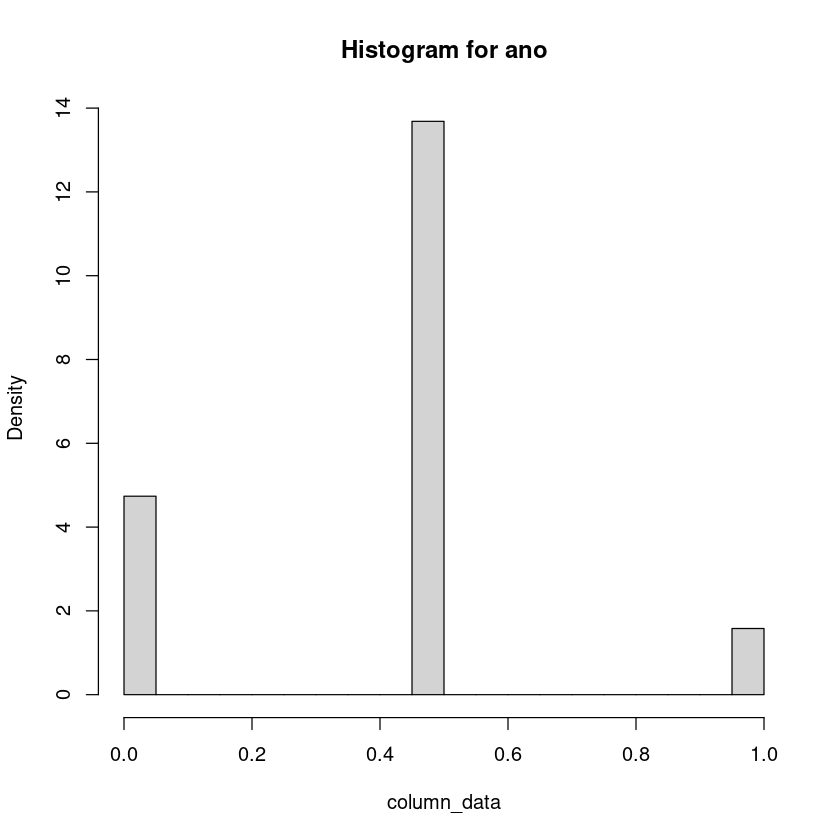

NULL
Processing column: semana 


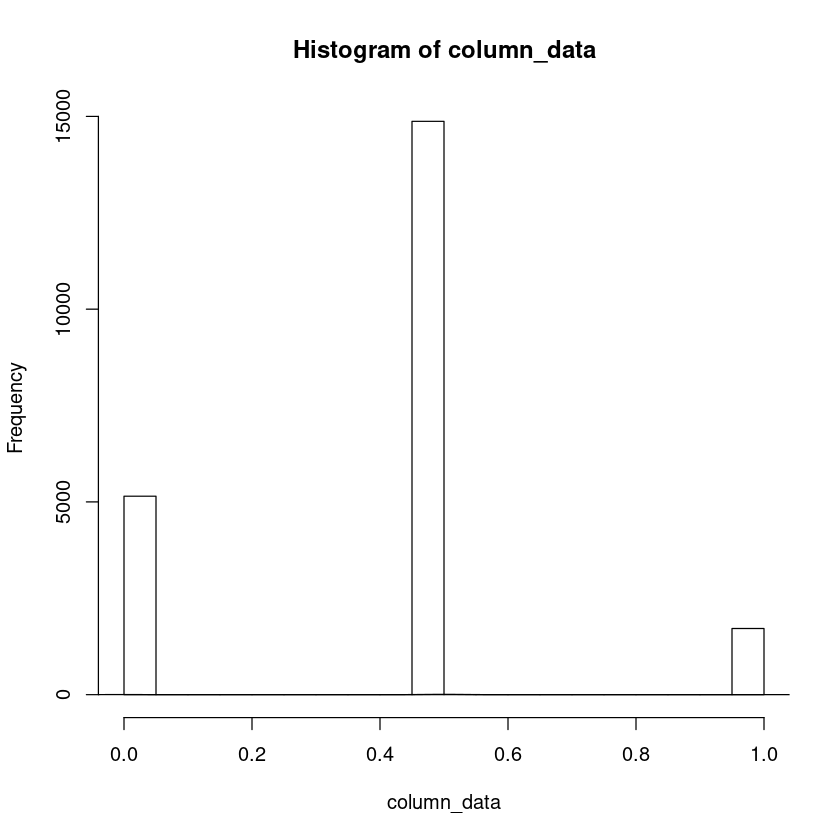

NULL
Processing column: n_vacunas 


ERROR: Error in hist.default(column_data, freq = FALSE, main = paste("Histogram for", : invalid number of 'breaks'


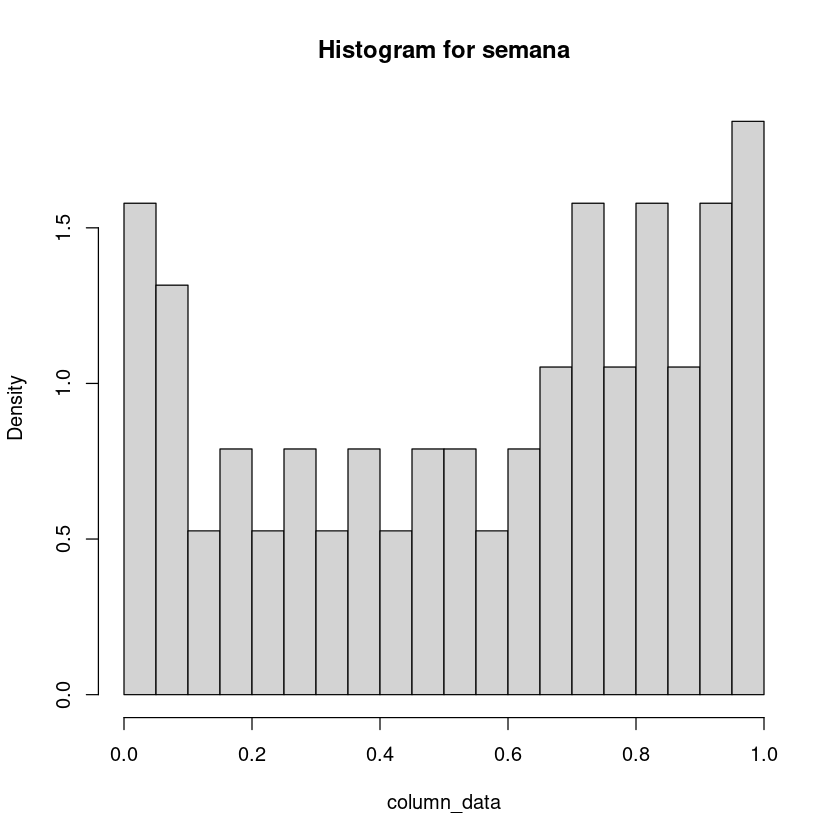

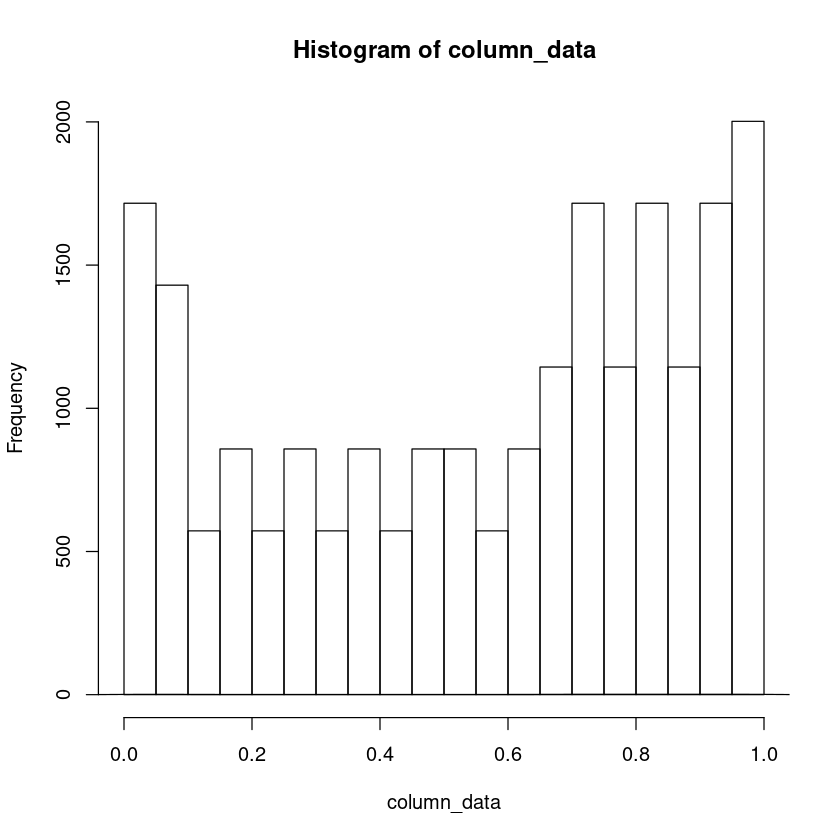

In [25]:
data_normalized <- data
for (col_name in names(numeric_cols)[numeric_cols]) {
  data_normalized[[col_name]] <- (data[[col_name]] - min(data[[col_name]])) / 
                                 (max(data[[col_name]]) - min(data[[col_name]]))
}

for (col_name in names(cols)[cols]) {
    cat("Processing column:", col_name, "\n")
    column_data <- data_normalized[[col_name]]
    hist_plot <- hist(column_data, freq = FALSE, main = paste("Histogram for", col_name))
    print(plot(hist_plot))
    lines(density(column_data))
}

### Standarization Transform

<font color='tomato'>Select columns</font>

In [27]:
cols <- sapply(data, is.numeric)

<font color='darkgrey'><b>Operation</font>

Processing column: ano 


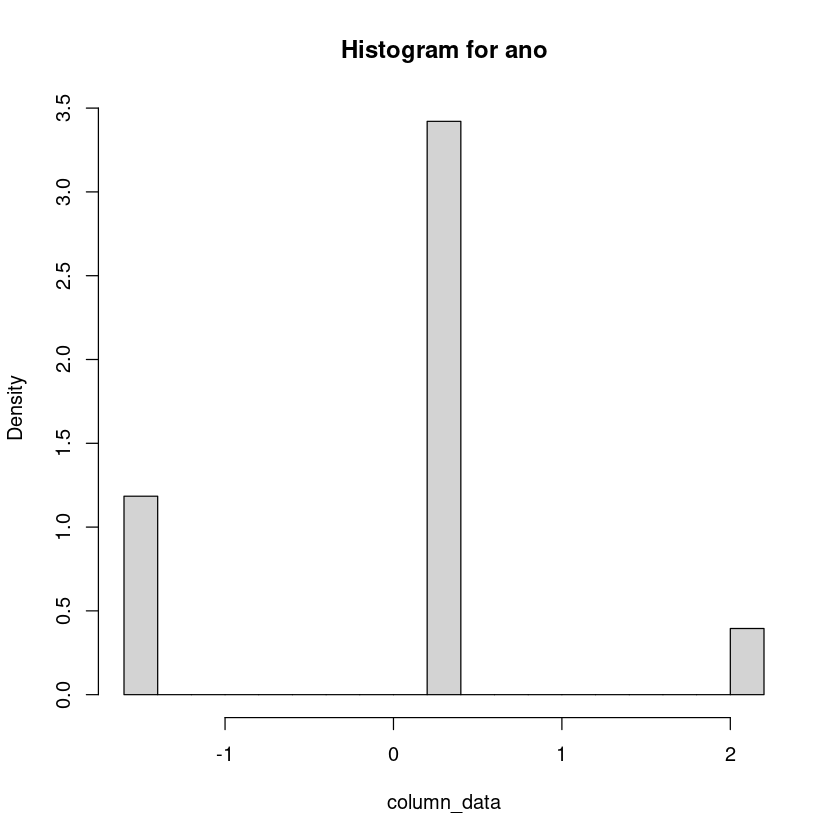

NULL
Processing column: semana 


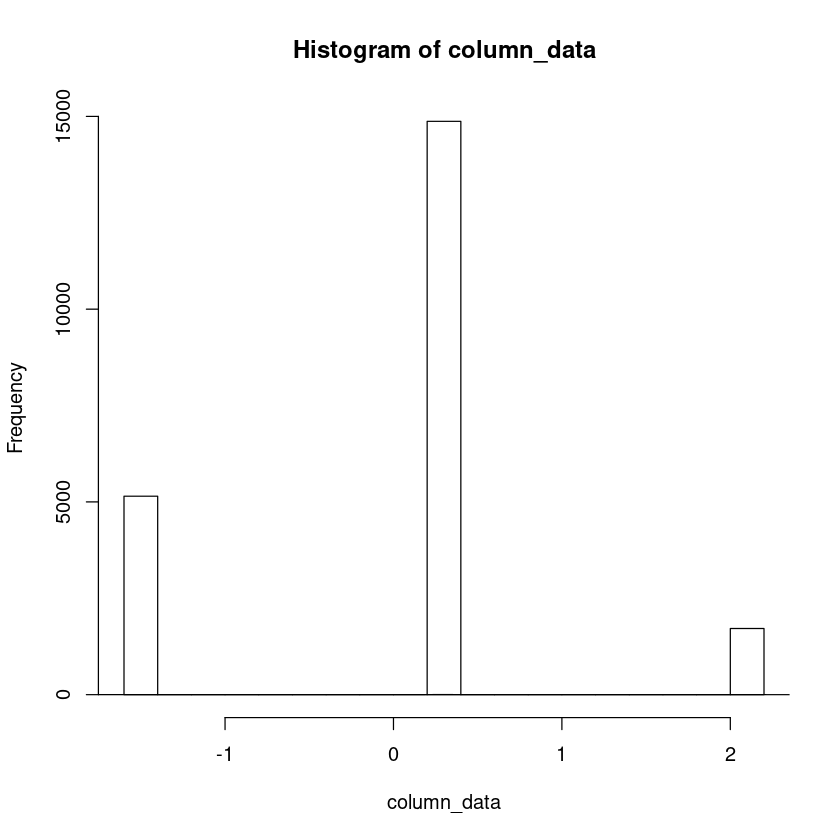

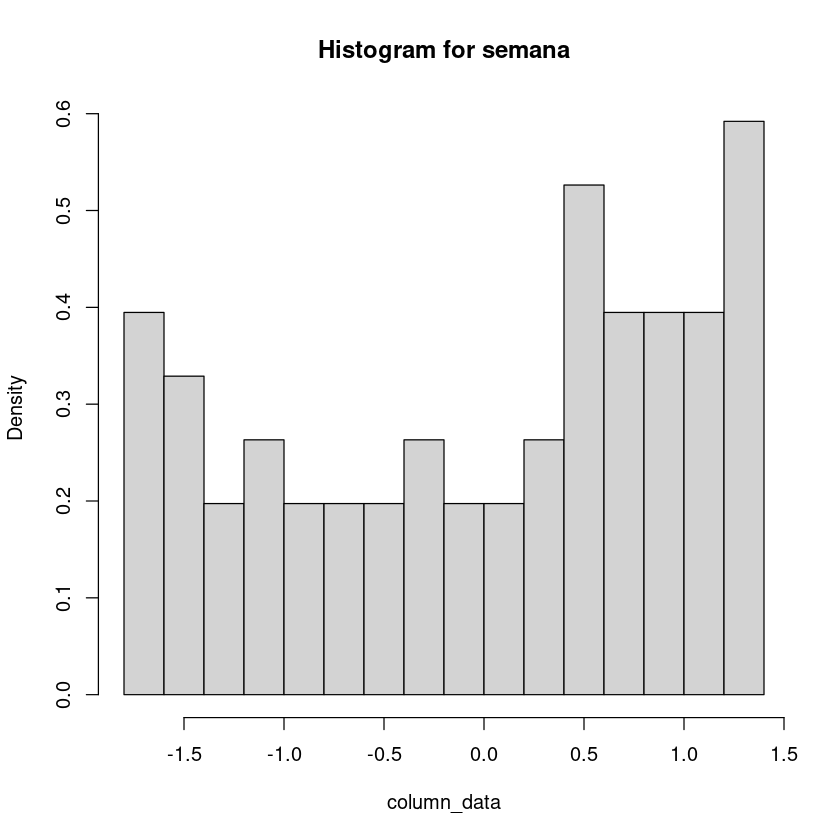

NULL
Processing column: n_vacunas 


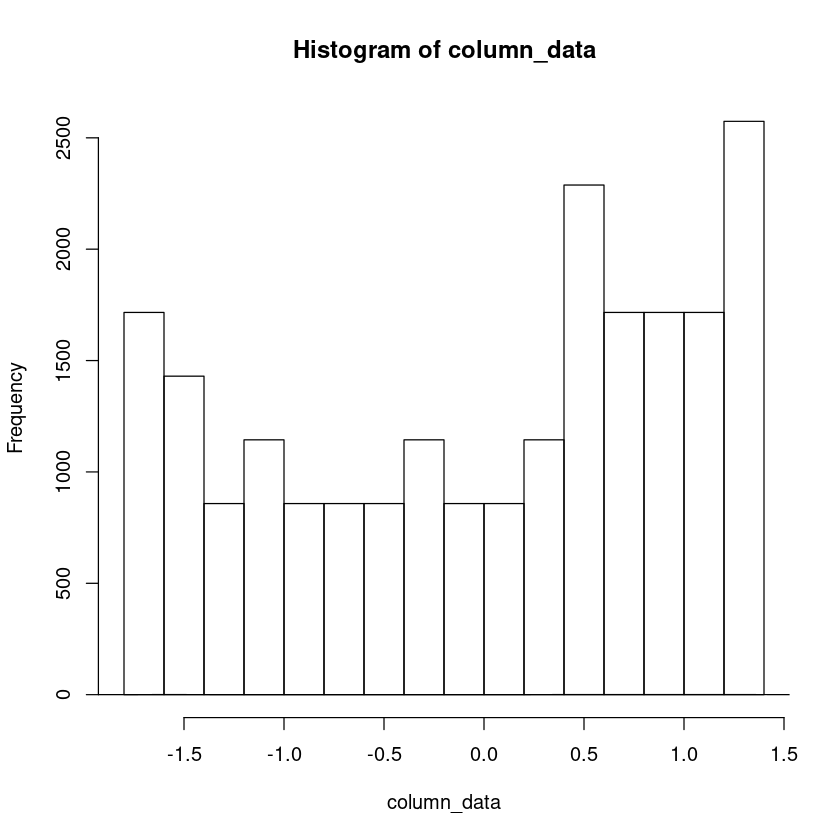

NULL


ERROR: Error in density.default(column_data): 'x' contains missing values


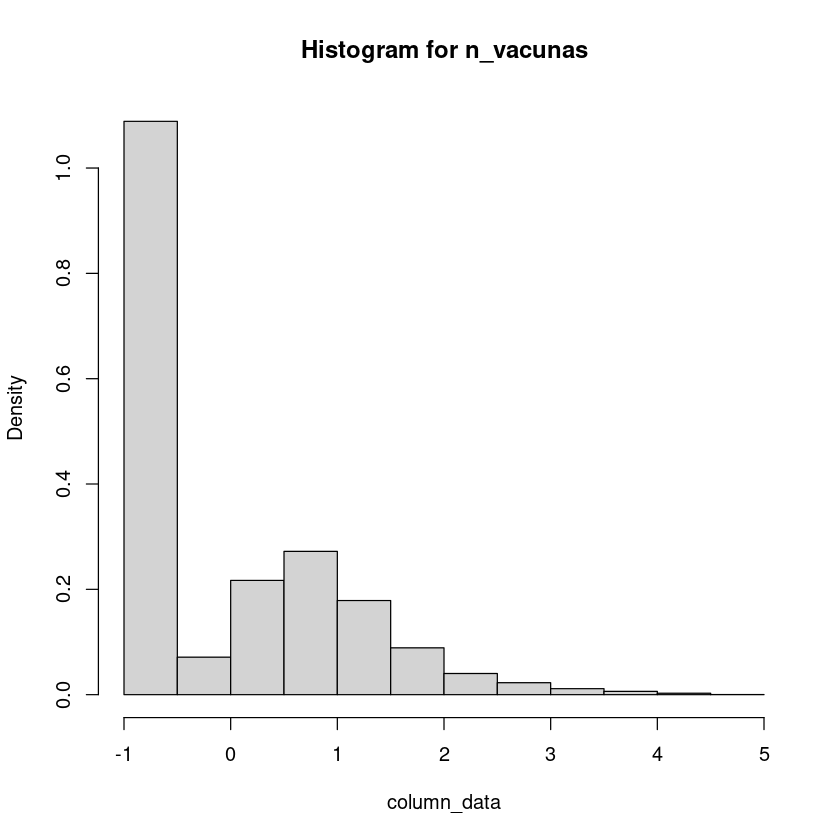

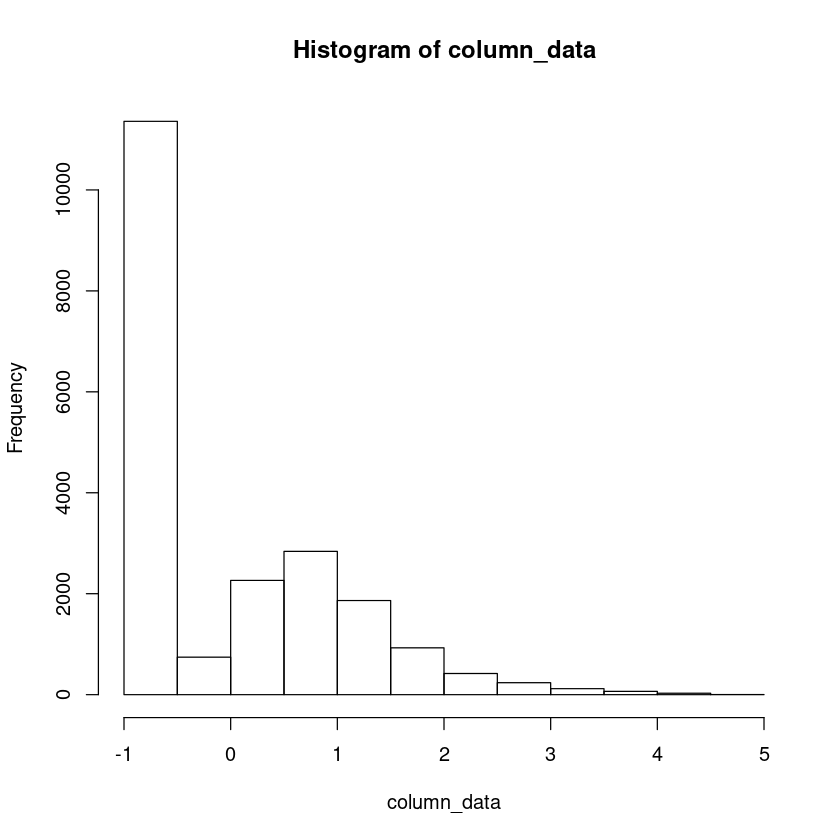

In [26]:
data_standardized <- data

for (col_name in names(numeric_cols)[numeric_cols]) {
  data_standardized[[col_name]] <- scale(data[[col_name]])
}
for (col_name in names(cols)[cols]) {
    cat("Processing column:", col_name, "\n")
    column_data <- data_standardized[[col_name]]
    hist_plot <- hist(column_data, freq = FALSE, main = paste("Histogram for", col_name))
    print(plot(hist_plot))
    lines(density(column_data))
}

## Numeric Variable Transformation: Distribution

###	Discretization Transform

##### Evaluating Discretization Transformations

#### Uniform Discretization Transform

<font color='tomato'>Select columns</font>

In [28]:
cols <- sapply(data, is.numeric)

<font color='darkgrey'><b>Operation</font>

Processing column: ano 


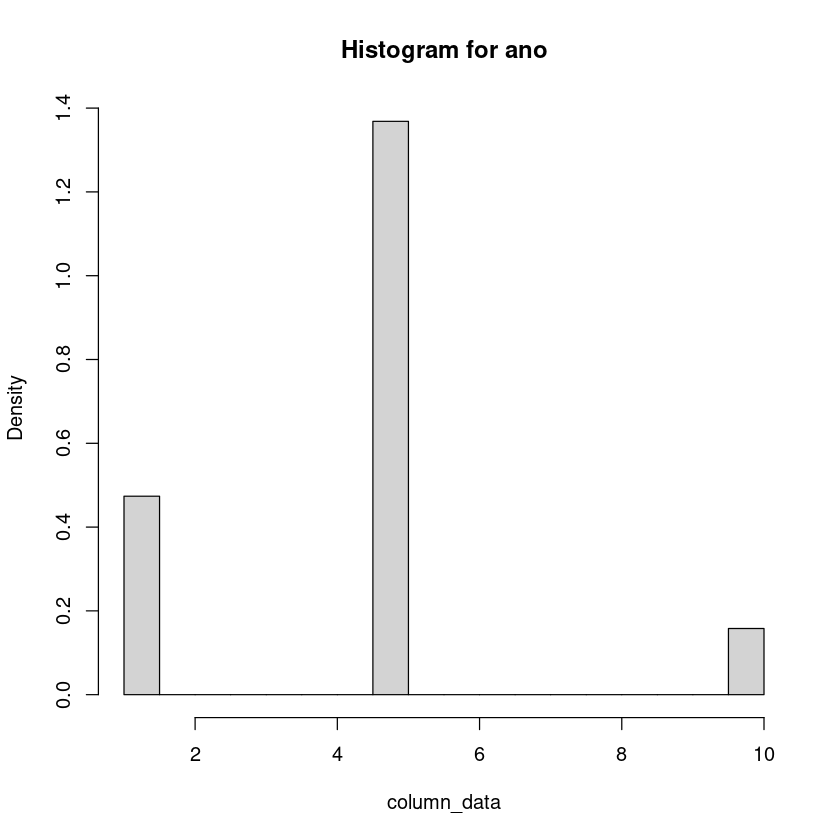

NULL
Processing column: semana 


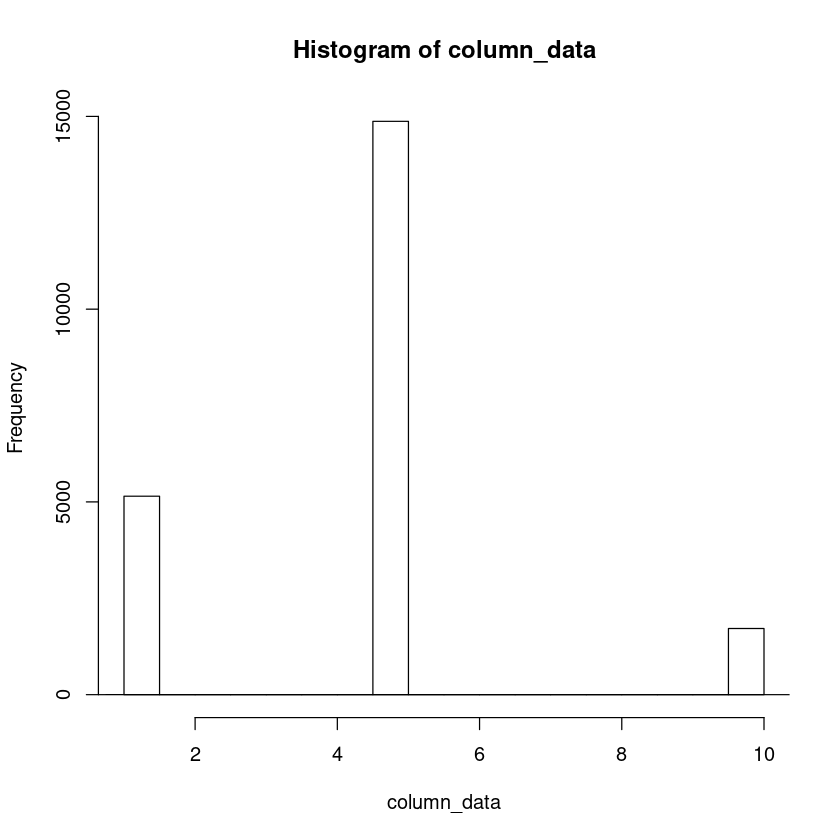

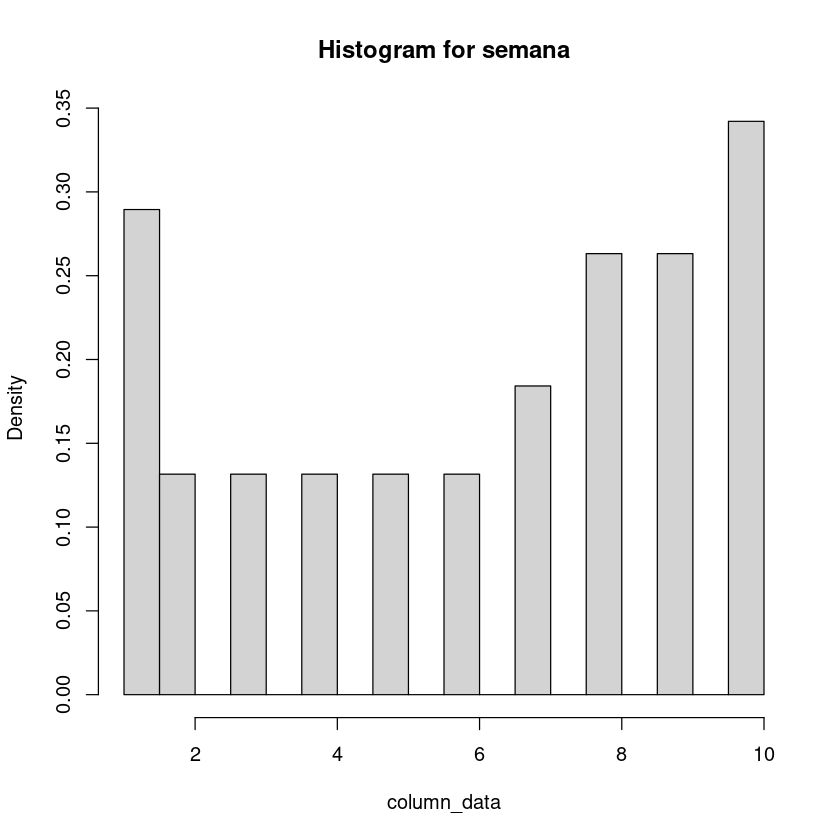

NULL
Processing column: n_vacunas 


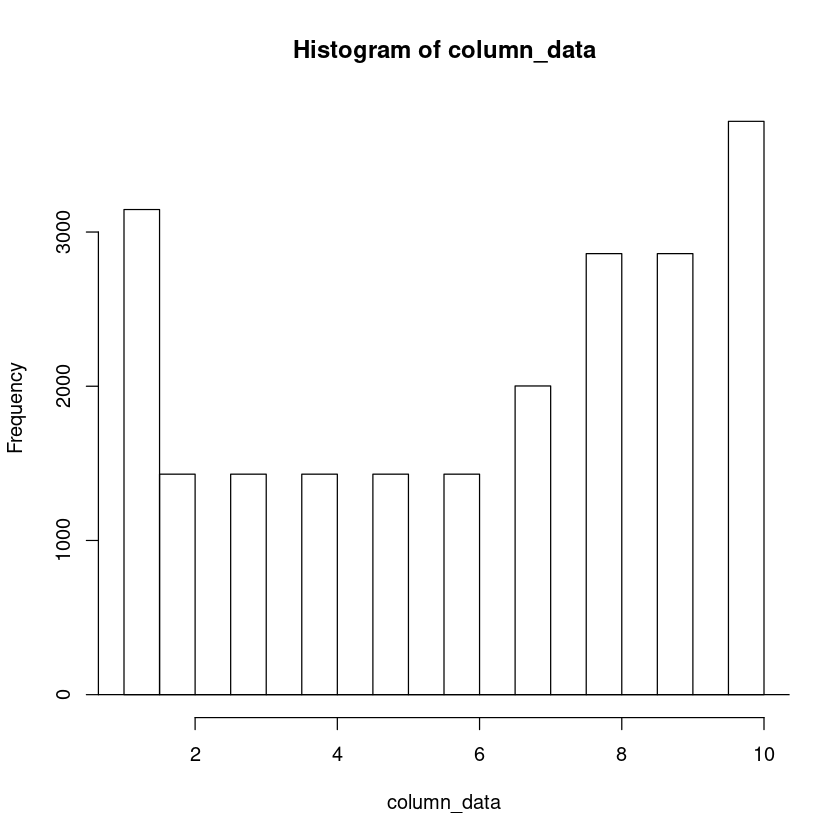

NULL


ERROR: Error in density.default(column_data): 'x' contains missing values


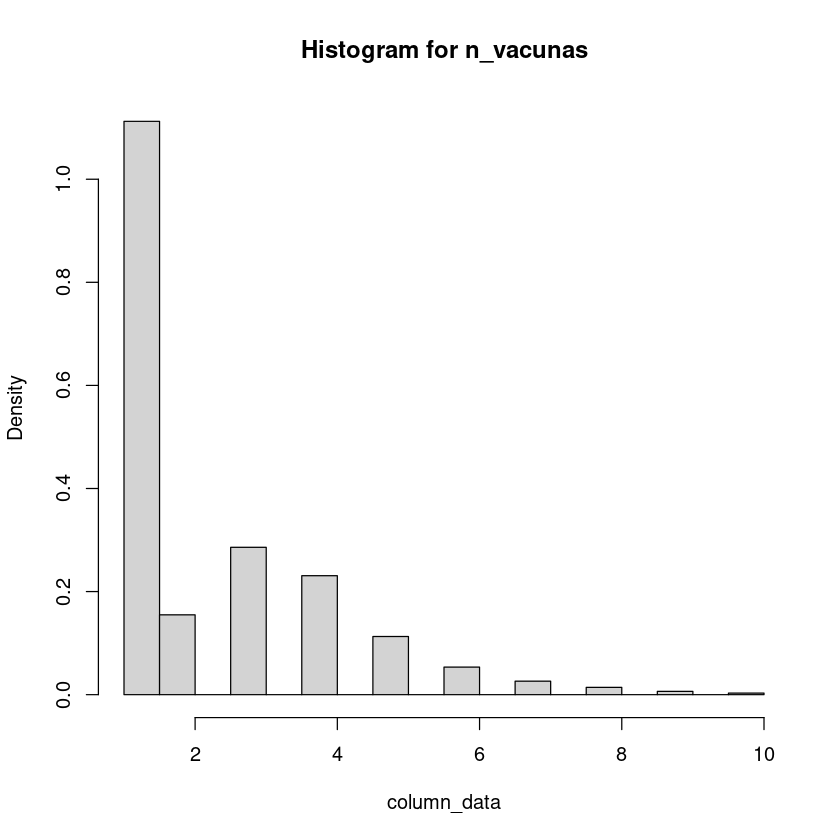

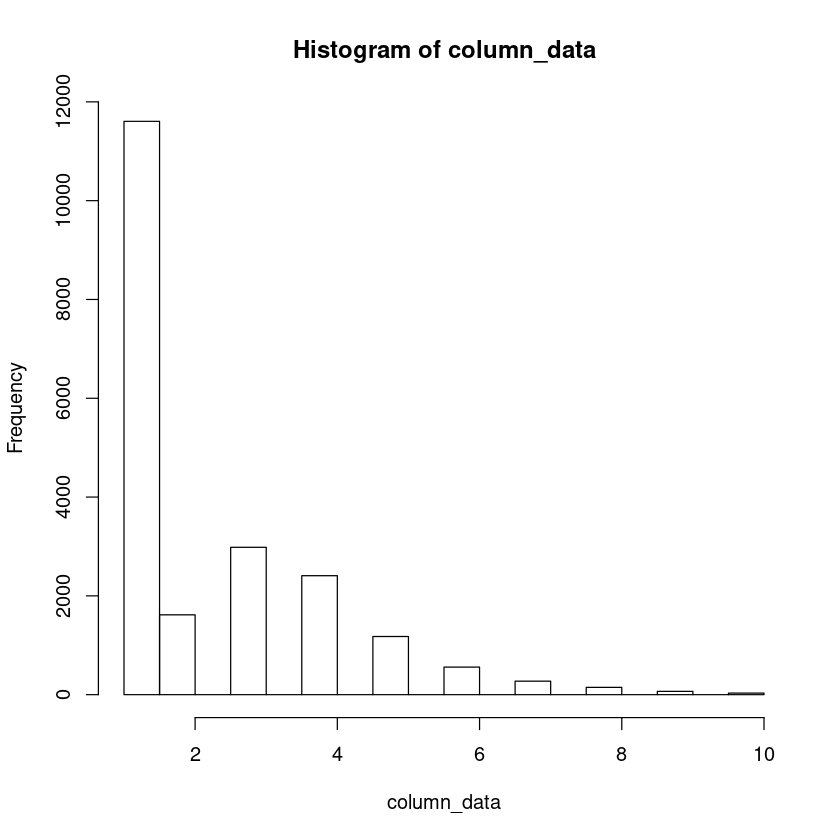

In [32]:
# create a copy of the original data frame
data_discretized <- data

# number of intervals
k <- 10  # change this value according to your needs

# discretize each numeric column
for (col_name in names(numeric_cols)[numeric_cols]) {
  data_discretized[[col_name]] <- cut(data[[col_name]], breaks = k, labels = FALSE)
}
for (col_name in names(cols)[cols]) {
    cat("Processing column:", col_name, "\n")
    column_data <- data_discretized[[col_name]]
    hist_plot <- hist(column_data, freq = FALSE, main = paste("Histogram for", col_name))
    print(plot(hist_plot))
    lines(density(column_data))
}

### Power Transform

#### Data to Transform

##### Evaluating Yeo-Johnson tranform

#### Yeo-Johnson Transform

<font color='tomato'>Select columns</font>

In [37]:
cols <- sapply(data, is.numeric)

<font color='darkgrey'><b>Operation</font>

Warning message in optimize(yj_loglik, lower = lower, upper = upper, maximum = TRUE, :
“NA/Inf replaced by maximum positive value”
Warning message in optimize(yj_loglik, lower = lower, upper = upper, maximum = TRUE, :
“NA/Inf replaced by maximum positive value”
Warning message in optimize(yj_loglik, lower = lower, upper = upper, maximum = TRUE, :
“NA/Inf replaced by maximum positive value”
Warning message in optimize(yj_loglik, lower = lower, upper = upper, maximum = TRUE, :
“NA/Inf replaced by maximum positive value”
Warning message in optimize(yj_loglik, lower = lower, upper = upper, maximum = TRUE, :
“NA/Inf replaced by maximum positive value”
Warning message in optimize(yj_loglik, lower = lower, upper = upper, maximum = TRUE, :
“NA/Inf replaced by maximum positive value”
Warning message in optimize(yj_loglik, lower = lower, upper = upper, maximum = TRUE, :
“NA/Inf replaced by maximum positive value”
Warning message in optimize(yj_loglik, lower = lower, upper = upper, maximum = TRUE

Processing column: ano 


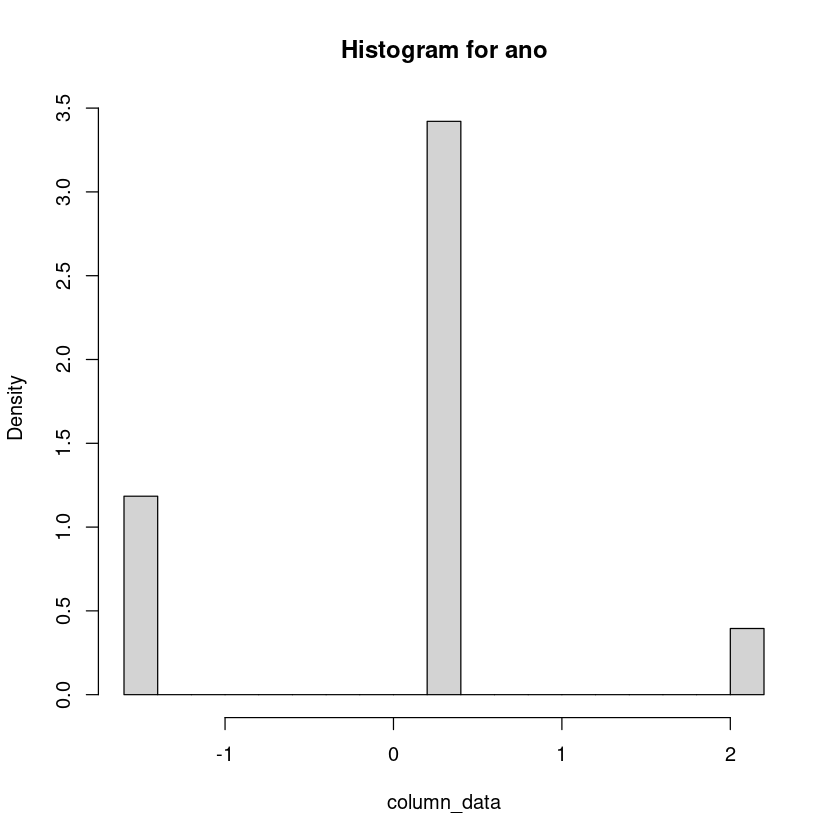

NULL
Processing column: semana 


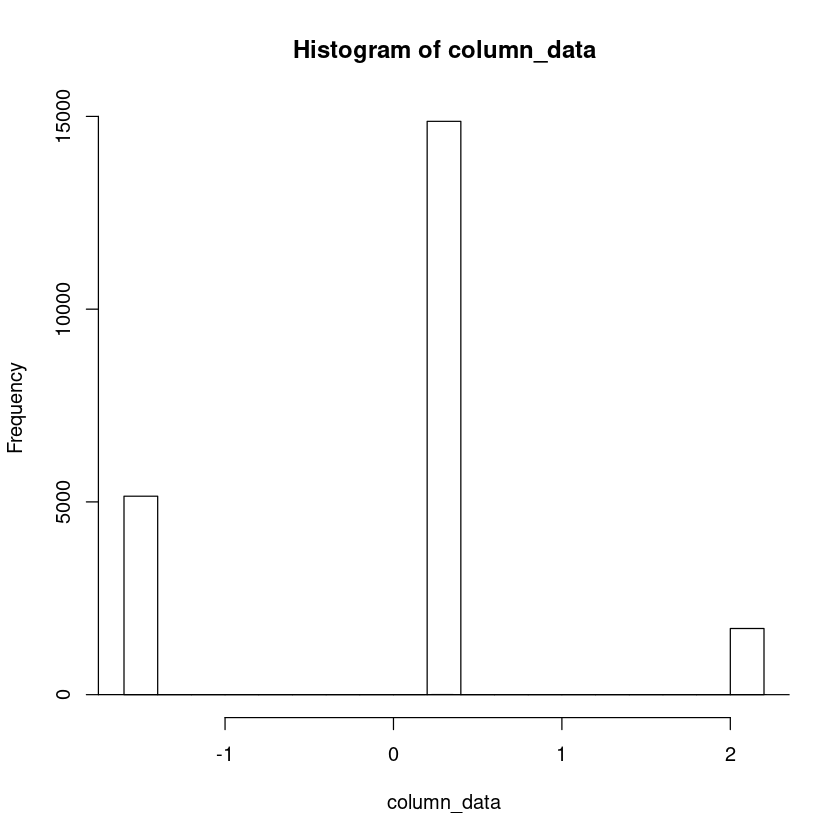

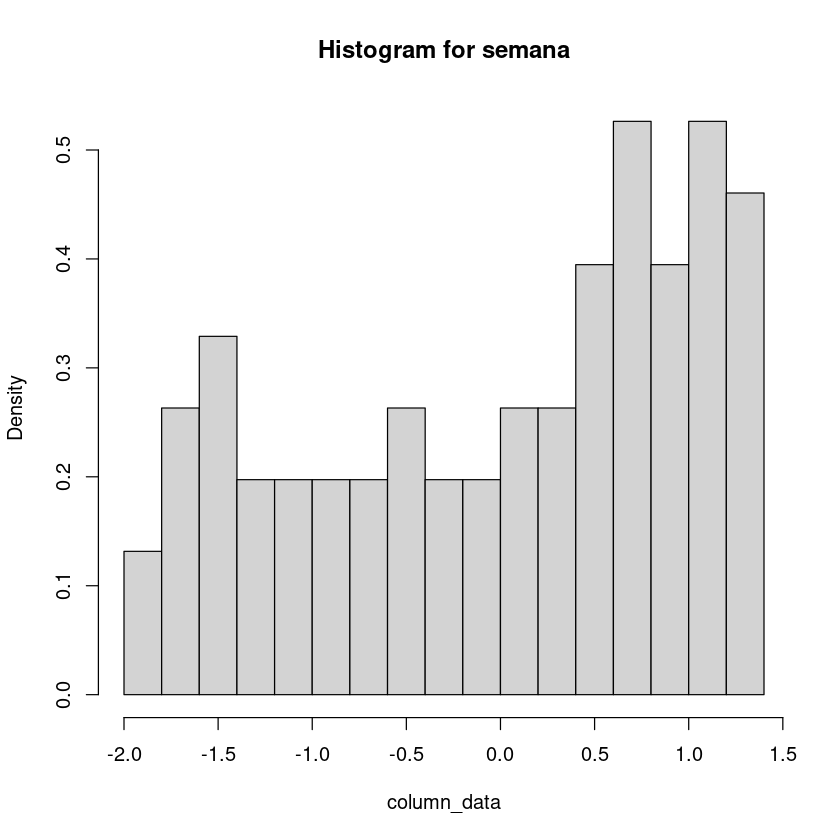

NULL
Processing column: n_vacunas 


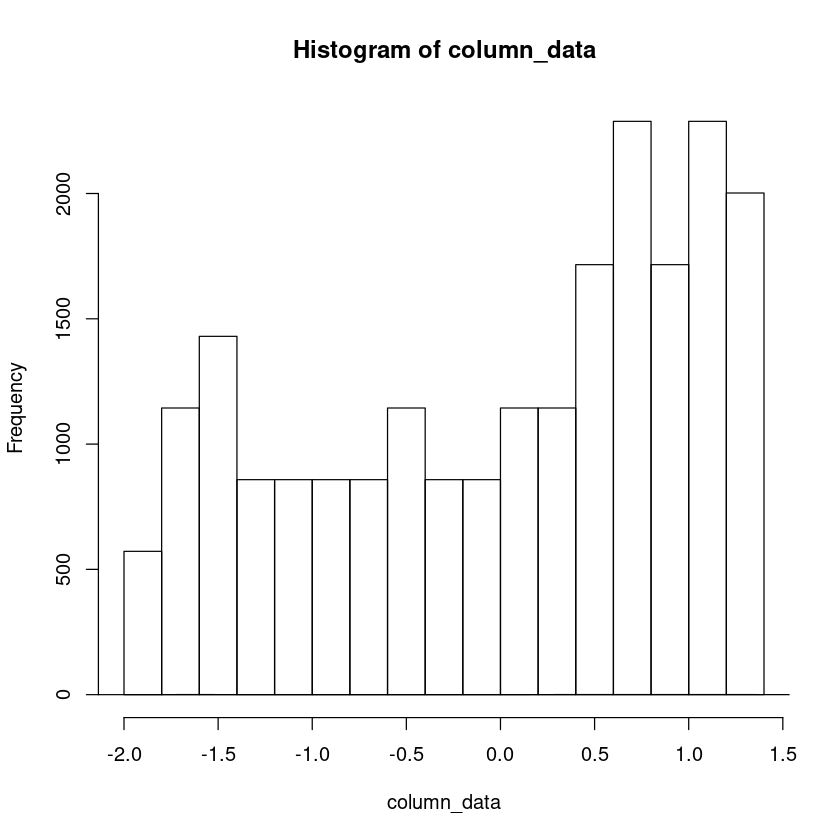

NULL


ERROR: Error in density.default(column_data): 'x' contains missing values


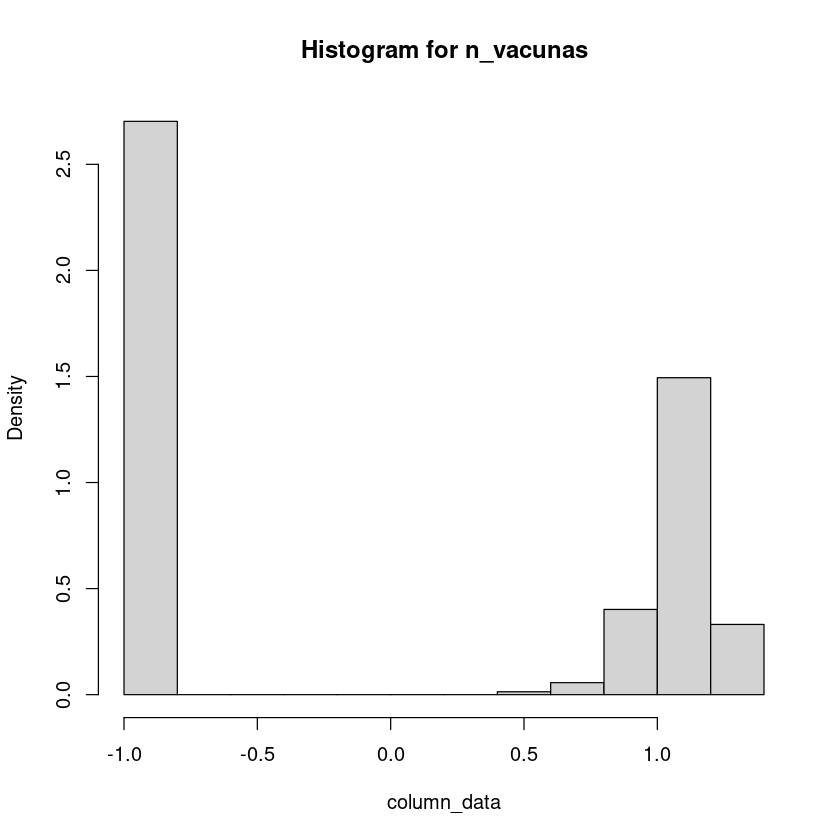

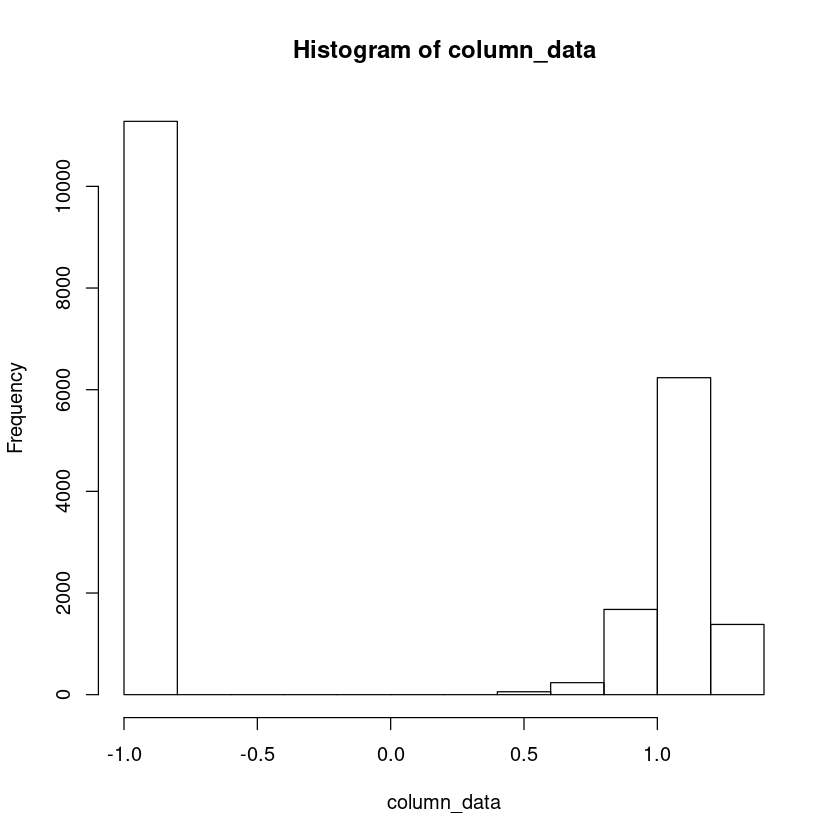

In [39]:
if (!require(bestNormalize)) {
  install.packages('bestNormalize')
}

# load the bestNormalize package
library(bestNormalize)

# assuming 'data' is your data frame

# identify the numeric columns
numeric_cols <- sapply(data, is.numeric)

# create a copy of the original data frame
data_yeojohnson <- data

# apply the Yeo-Johnson transformation to each numeric column
for (col_name in names(numeric_cols)[numeric_cols]) {
  yj <- yeojohnson(data[[col_name]])
  data_yeojohnson[[col_name]] <- yj$x.t
}
for (col_name in names(cols)[cols]) {
    cat("Processing column:", col_name, "\n")
    column_data <- data_yeojohnson[[col_name]]
    hist_plot <- hist(column_data, freq = FALSE, main = paste("Histogram for", col_name))
    print(plot(hist_plot))
    lines(density(column_data))
}